In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #used for the visualization
import seaborn as sns #for visualization
%matplotlib inline

sns.set_style('whitegrid')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
df = pd.read_csv('../input/student-mat.csv') #read the data set using pandas.read_csv()
df.head() #from this we retrieve the top five row of the dataset

student-mat.csv
student-merge.R
student-por.csv



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
df.info() #gives the info about data null values and many more

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [14]:
df.describe() #give the aggregrate of the data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


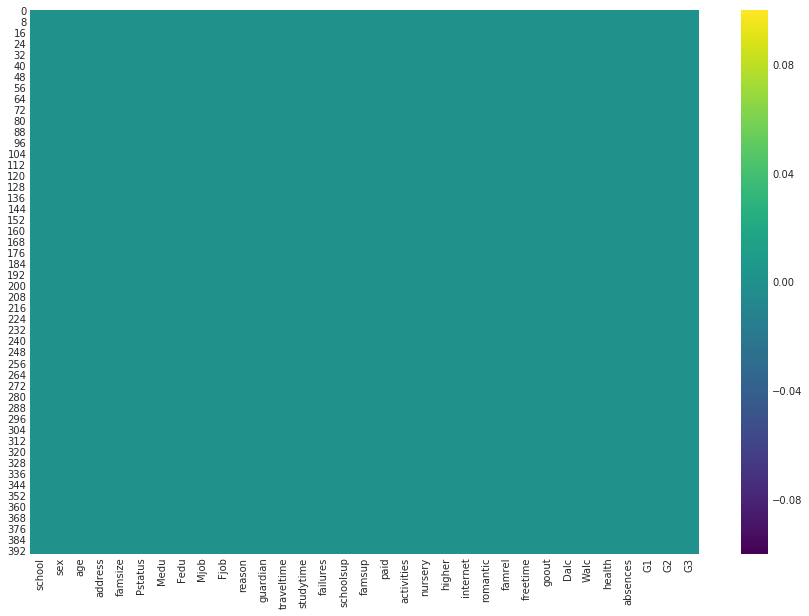

In [16]:
#another way to show the null values or missing values in data is using the heat map
plt.figure(figsize = (15,10))
sns.heatmap(df.isnull(), cmap = 'viridis')
plt.show()
#it doesn't show any sign in the whole heatmap thus it hasn't any missing value

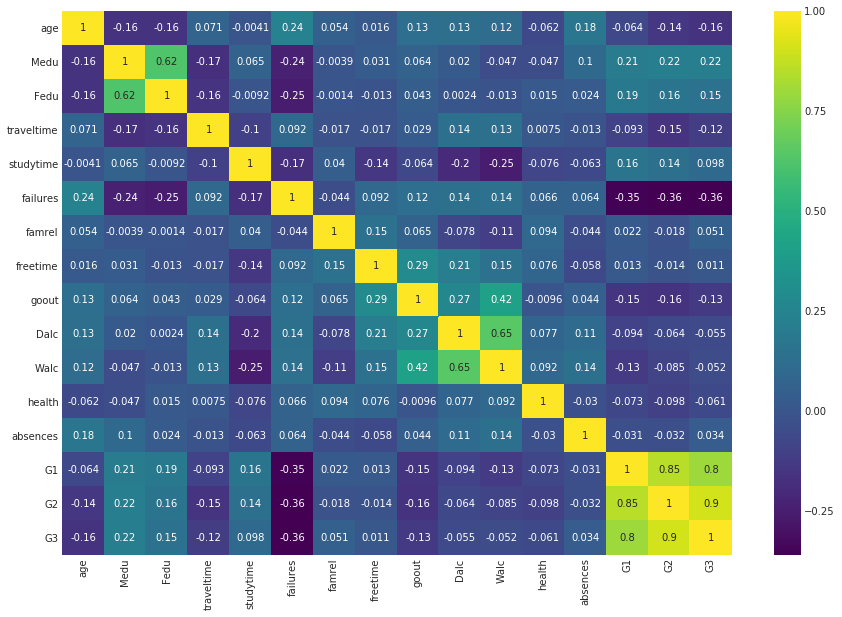

In [17]:
#create heatmap of corelation of the data
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)
plt.show()

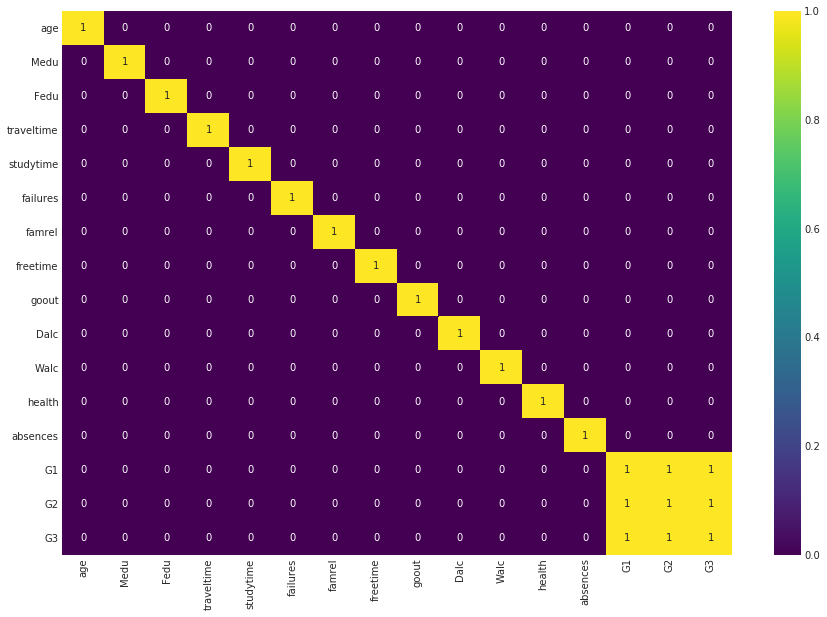

In [18]:
#the value with 1 is shows the corr()>0.7
plt.figure(figsize = (15,10))
sns.heatmap(df.corr()>0.75, cmap = 'viridis', annot = True)
plt.show()

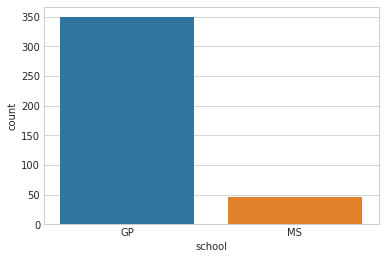

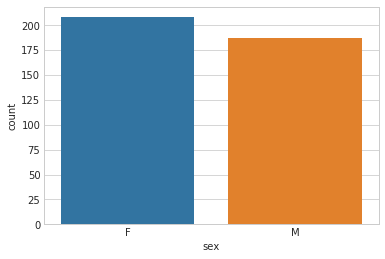

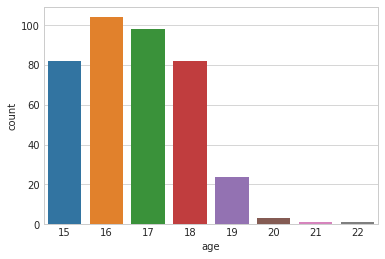

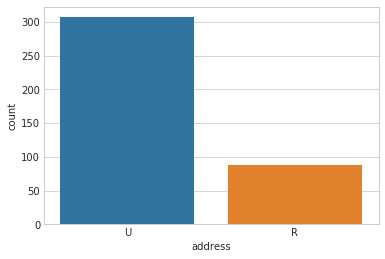

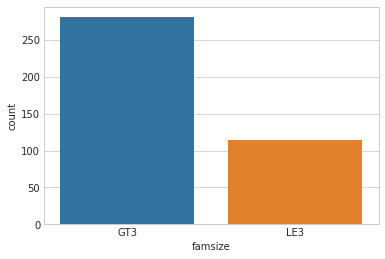

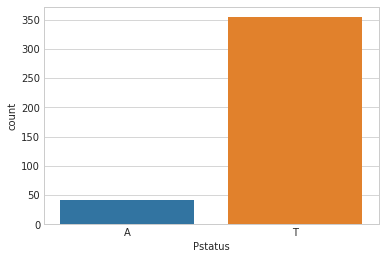

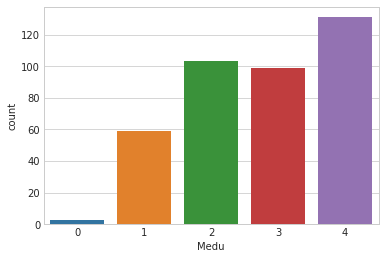

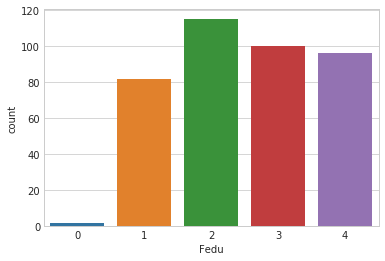

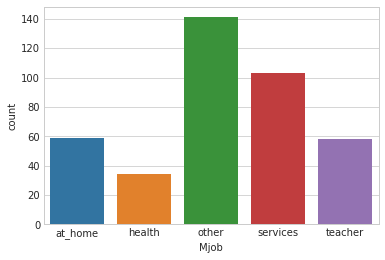

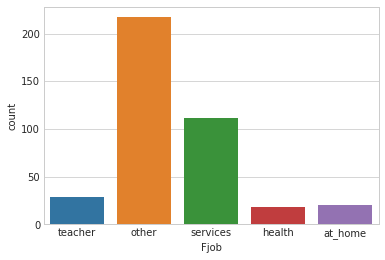

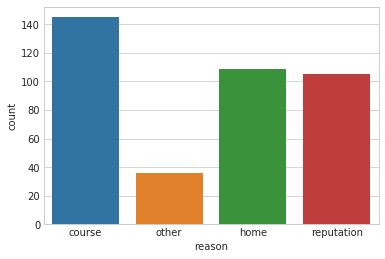

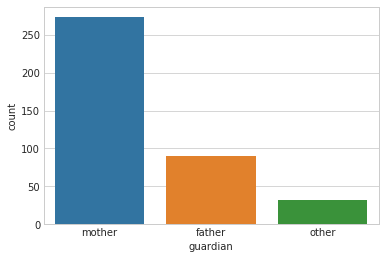

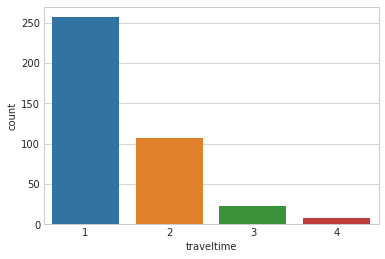

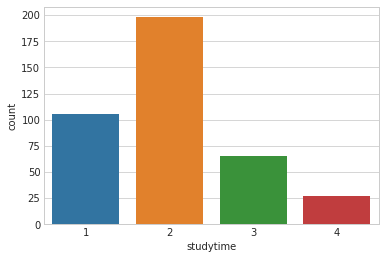

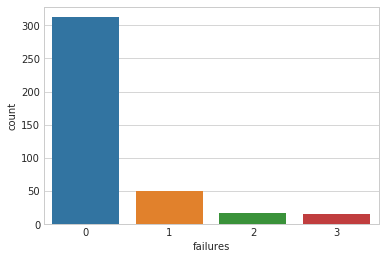

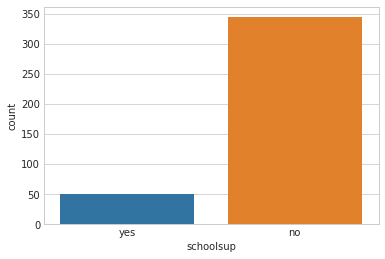

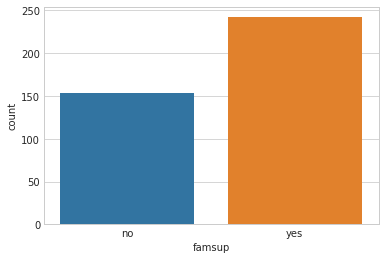

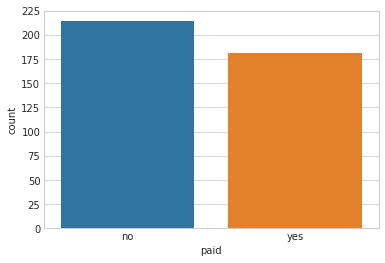

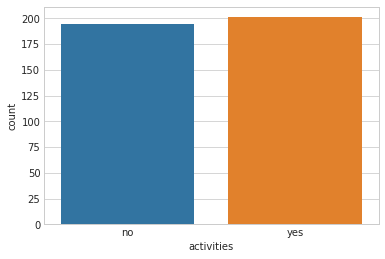

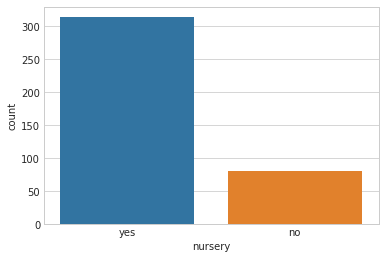

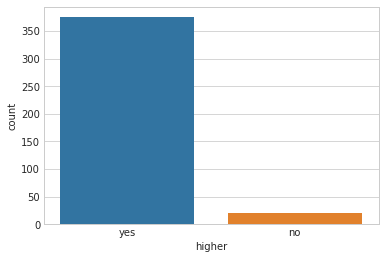

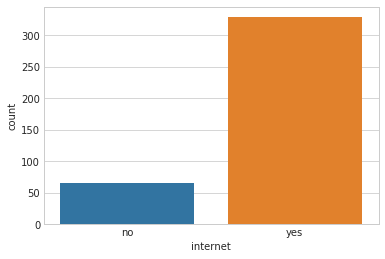

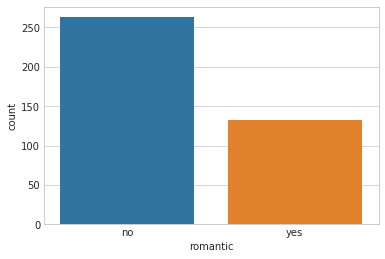

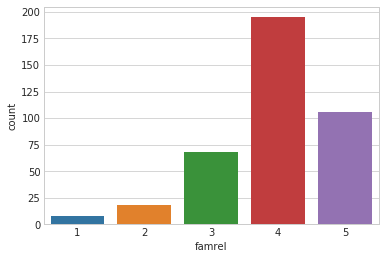

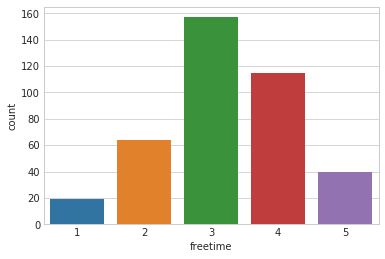

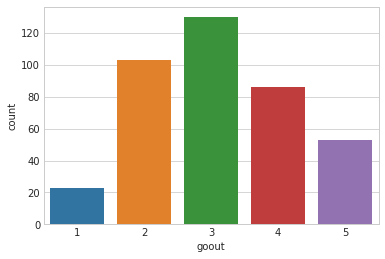

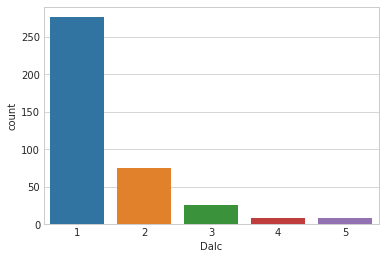

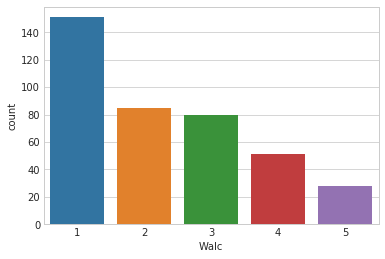

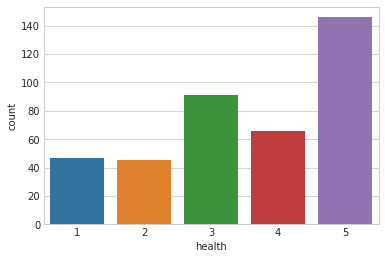

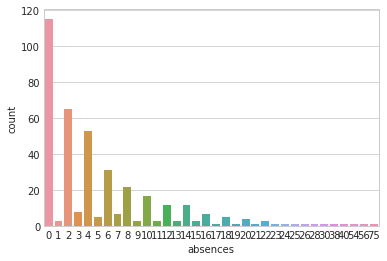

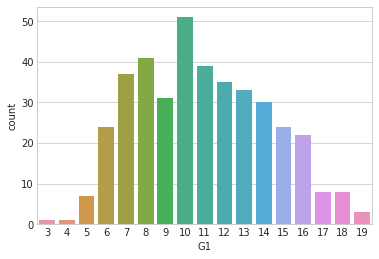

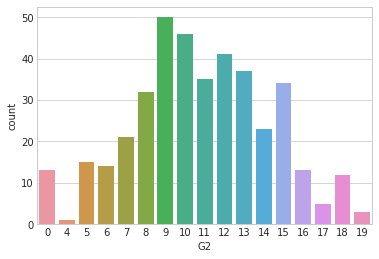

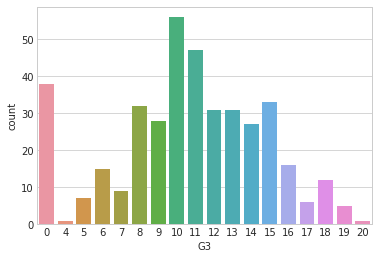

In [23]:
#countplot of all the columns in the df dataframe, shows the result in the form of counting
for col in df.columns:
    sns.countplot(col, data = df)
    plt.show()

In [25]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

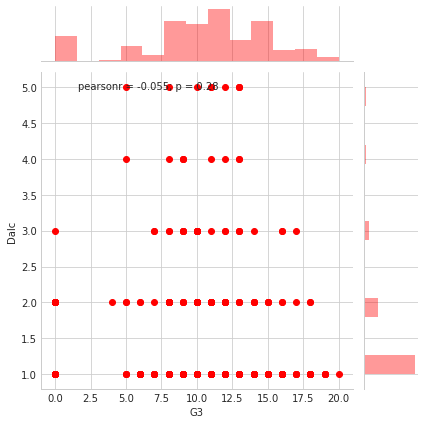

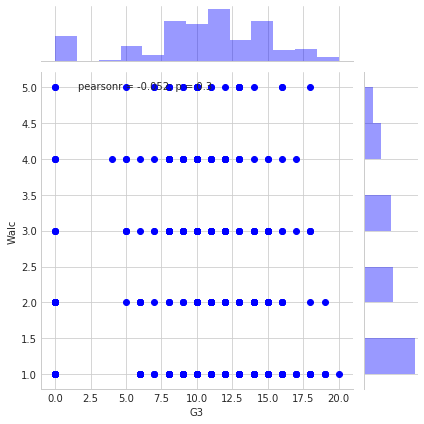

In [41]:
sns.jointplot(x = 'G3', y = 'Dalc', data = df, color = 'red')
sns.jointplot(x = 'G3', y = 'Walc', data = df, color = 'blue')
plt.show()

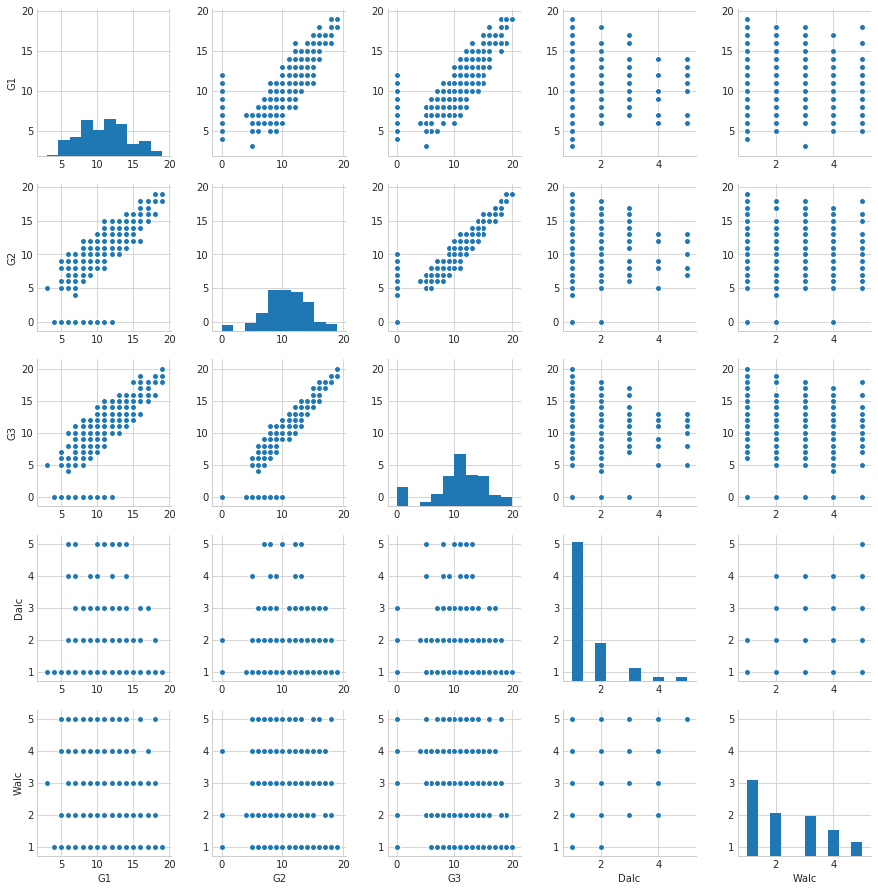

In [57]:
#pairplot of the selected columns of the dataframe
df1 = pd.DataFrame(columns = ['G1', 'G2', 'G3', 'Dalc', 'Walc'], data = df)
sns.pairplot(df1)

In [60]:
#get dummy value for the categorial values
df2 = pd.get_dummies(df)
df2.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [66]:
#check for the null values there is no null values in the dataframe
df2.isnull().count()

age                  395
Medu                 395
Fedu                 395
traveltime           395
studytime            395
failures             395
famrel               395
freetime             395
goout                395
Dalc                 395
Walc                 395
health               395
absences             395
G1                   395
G2                   395
G3                   395
school_GP            395
school_MS            395
sex_F                395
sex_M                395
address_R            395
address_U            395
famsize_GT3          395
famsize_LE3          395
Pstatus_A            395
Pstatus_T            395
Mjob_at_home         395
Mjob_health          395
Mjob_other           395
Mjob_services        395
Mjob_teacher         395
Fjob_at_home         395
Fjob_health          395
Fjob_other           395
Fjob_services        395
Fjob_teacher         395
reason_course        395
reason_home          395
reason_other         395
reason_reputation    395


In [72]:
#that are the dataset set for the machine learning algorithm
X1 = df2.drop(['G1', 'G2', 'G3'], axis = 1) #without any grading value 
X2 = df2.drop(['G3'], axis = 1) #withot final grade
y1 = df2['G1']
y2 = df2['G2']
y3 = df2['G3']

In [75]:
from sklearn.model_selection import train_test_split
#use to analyse the G1 grading
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

[  3.37049866   8.8239212   10.1770401    9.38443756  10.61853027]


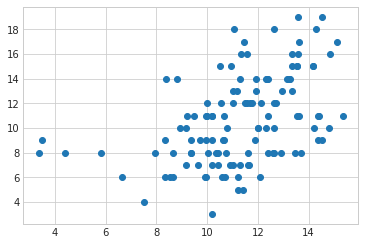

In [97]:
#here the linearregression model is used
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
print(predictions[:5])
plt.scatter(predictions, y_test)

In [98]:
from sklearn import metrics

In [119]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('The score of the grade G1')
print(lm.score(X_test, y_test))

MAE: 1.52473860027
MSE: 4.99199681788
RMSE: 2.23427769489
The score of the grade G1
0.772905904057


In [100]:
from sklearn.model_selection import train_test_split
#use to analyse the G2 grading
X_train, X_test, y_train, y_test = train_test_split(X1, y2, test_size = 0.3, random_state = 42)

[  5.27294922   9.31640625   9.03271484  11.17871094  10.93554688]


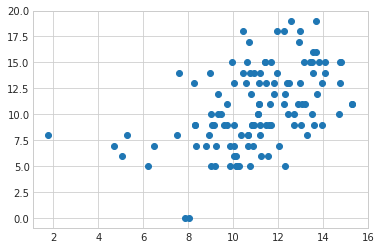

In [101]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
print(predictions[:5])
plt.scatter(predictions, y_test)

In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('The score of the grade G2')
print(lm.score(X_test, y_test))

MAE: 1.52473860027
MSE: 4.99199681788
RMSE: 2.23427769489
The score of the grade G2
0.772905904057


In [103]:
from sklearn.model_selection import train_test_split
#use to analyse the G3 grading
X_train, X_test, y_train, y_test = train_test_split(X1, y3, test_size = 0.3, random_state = 42)

[  2.58251953   7.96801758   8.30151367  11.53710938  10.79467773]


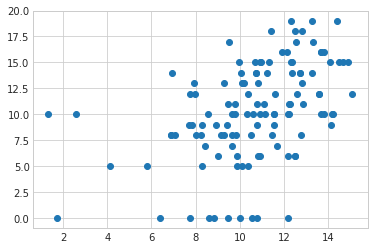

In [104]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
print(predictions[:5])
plt.scatter(predictions, y_test)

In [122]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('The score of the grade G3')
print(lm.score(X_test, y_test))

MAE: 1.52473860027
MSE: 4.99199681788
RMSE: 2.23427769489
The score of the grade G3
0.772905904057


In [106]:
from sklearn.model_selection import train_test_split
#use to analyse the G3 grading using the grade G1 and G2 also
X_train, X_test, y_train, y_test = train_test_split(X2, y3, test_size = 0.3, random_state = 42)

[  6.30076599  11.77848816   2.71769714   9.13999939   8.56394958]


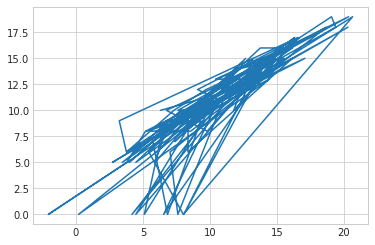

In [118]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
print(predictions[:5])
plt.plot(predictions, y_test)

In [124]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('The score of the grade G3 including G1 an G2')
print(lm.score(X_test, y_test))
print('Shows that the grade G1 and G2 not affected the result.')

MAE: 1.52473860027
MSE: 4.99199681788
RMSE: 2.23427769489
The score of the grade G3 including G1 an G2
0.772905904057
Shows that the grade G1 and G2 not affected the result.


In [117]:
#Now using the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

[ 8 11 10  7 10]
0.117647058824


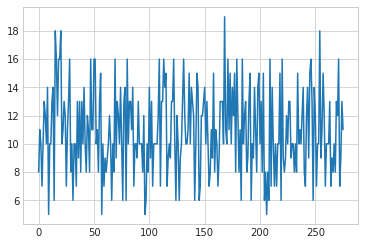

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

logM = LogisticRegression()
logM.fit(X_train, y_train)
predictions = logM.predict(X_train)
print(predictions[:5])
plt.plot(predictions)

#print('The confusion matrix for G1:')
#print(confusion_matrix(predictions, y_test))
#print('The classification_report of G1:')
#print(classification_report(predictions, y_test))

print(logM.score(X_test, y_test))

